In [ ]:
%matplotlib inline
from exoplanet_rvfit import *

# import list of all stars in catalog

with open('/home/anna/Desktop/self_teaching/blog/data/Keck_RVs/Keck_catalog.txt') as temp_file:
    starIDs= [line.rstrip('\n') for line in temp_file]
print (repr(len(starIDs)),' stars with Keck HIRES high-precision data')
numStars=len(starIDs)

# record candidate detections into file
outfile = open('/home/anna/Desktop/self_teaching/blog/data/Keck_RVs/candidate_stars_pthresh0.8.txt', 'w')
print('# Star / Orbital period [days] / Power / Amplitude [m/s] / Phase shift [rad] / Offset [m/s]', file=outfile)
print('# Amplitude, phase, and offset are fit to phase-folded data (freq=2 Pi)', file=outfile)

# check that num data points > min_N_obs 
candidate_count=0
for s in range(numStars):
    star = Star(starIDs[s], data_dir='/home/anna/Desktop/self_teaching/blog/data/Keck_RVs/')
    
    # check that num data points > min_num_obs 
    min_number_obs = 9
    if star.N < min_number_obs:
        continue
        
    print(s,'/',numStars, 'stars, ',candidate_count,' host candidates')
    # set threshold for detection peak
    min_detection_threshold_power = 0.8
    star.find_period(num_best_fits=1, min_period=0.2, max_period=11, print_output=False)
    P, power = star.best_periods[0][0], star.best_periods[1][0]
    
    # move on if best period has score below threshold for detection
    if power < min_detection_threshold_power:
        continue
        
    # find best-fitting sine function to phase folded data A*sin(x+c)+b
    candidate_count+=1
    fit_params = star.fit_to_sine(fitNum=0)
    A, c, b = fit_params[0], fit_params[1], fit_params[2]
    print(starIDs[s], P, power, A, c, b, file=outfile)
    
    
    
outfile.close()

8 / 1699 stars,  3  host candidates
Finding optimal frequency:
 - Estimated peak width = 0.00145
 - Using 5 steps per peak; omega_step = 0.000291
 - User-specified period range:  0.2 to 11
 - Computing periods at 106138 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps
Finding optimal frequency:
 - Estimated peak width = 0.00145
 - Using 5 steps per peak; omega_step = 0.000291
 - User-specified period range:  0.2 to 11
 - Computing periods at 106138 steps


In [48]:
teststar = Star('G195-59', data_dir='../content/data/Keck_RVs/')
teststar.find_period(min_period=0.2, max_period=11, print_output=True)

Best-fitting periods:
P= 0.260899466573  days , power= 0.913418924292
P= 1.81634096714  days , power= 0.904483172669
P= 0.274584097529  days , power= 0.897759160551


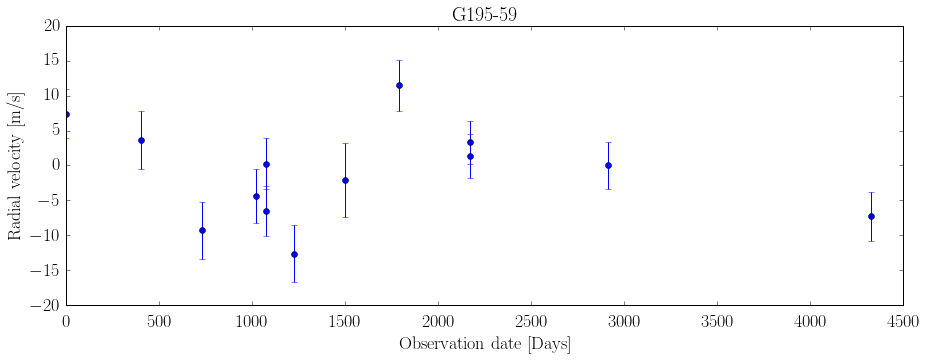

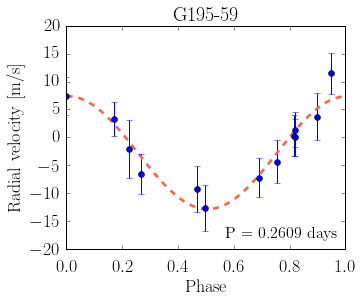

In [50]:
teststar.plot_raw_RVs()
teststar.plot_phased_RVs(num_plots=1)

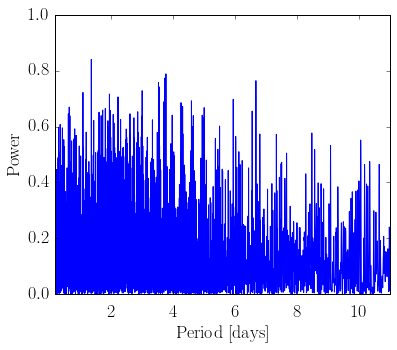

In [38]:
teststar.plot_periodogram(Nperiods=10000)